<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Products-Analysis" data-toc-modified-id="Products-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Products Analysis</a></span></li><li><span><a href="#Monthly/Seasonally-Performance-Analysis" data-toc-modified-id="Monthly/Seasonally-Performance-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Monthly/Seasonally Performance Analysis</a></span><ul class="toc-item"><li><span><a href="#Revenue-and-Sales-Volume-of-All-the-Products" data-toc-modified-id="Revenue-and-Sales-Volume-of-All-the-Products-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Revenue and Sales Volume of All the Products</a></span><ul class="toc-item"><li><span><a href="#Monthly-Performance" data-toc-modified-id="Monthly-Performance-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Monthly Performance</a></span></li><li><span><a href="#Seasonally-Performance" data-toc-modified-id="Seasonally-Performance-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Seasonally Performance</a></span></li></ul></li><li><span><a href="#Average-Price-by-Month" data-toc-modified-id="Average-Price-by-Month-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Average Price by Month</a></span><ul class="toc-item"><li><span><a href="#Average-Price-of-all-the-Products" data-toc-modified-id="Average-Price-of-all-the-Products-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Average Price of all the Products</a></span></li></ul></li><li><span><a href="#Active-Customers" data-toc-modified-id="Active-Customers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Active Customers</a></span><ul class="toc-item"><li><span><a href="#Monthly-Active-Customers" data-toc-modified-id="Monthly-Active-Customers-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Monthly Active Customers</a></span></li></ul></li></ul></li><li><span><a href="#Time-Cohort-Analysis" data-toc-modified-id="Time-Cohort-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Cohort Analysis</a></span><ul class="toc-item"><li><span><a href="#Acquisition-Month-Cohort" data-toc-modified-id="Acquisition-Month-Cohort-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Acquisition Month Cohort</a></span></li><li><span><a href="#Monthly-Active-Customers-by-Cohort" data-toc-modified-id="Monthly-Active-Customers-by-Cohort-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Monthly Active Customers by Cohort</a></span></li><li><span><a href="#Customer-Retention" data-toc-modified-id="Customer-Retention-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Customer Retention</a></span></li><li><span><a href="#Average-Monthly-Revenue-for-Each-Cohort" data-toc-modified-id="Average-Monthly-Revenue-for-Each-Cohort-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Average Monthly Revenue for Each Cohort</a></span></li></ul></li><li><span><a href="#Customer-Lifetime-Value(CLV)" data-toc-modified-id="Customer-Lifetime-Value(CLV)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Customer Lifetime Value(CLV)</a></span><ul class="toc-item"><li><span><a href="#Basic-CLV" data-toc-modified-id="Basic-CLV-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Basic CLV</a></span><ul class="toc-item"><li><span><a href="#Calculating-by-Month" data-toc-modified-id="Calculating-by-Month-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Calculating by Month</a></span></li><li><span><a href="#Calculating-by-Year" data-toc-modified-id="Calculating-by-Year-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Calculating by Year</a></span></li></ul></li><li><span><a href="#Traditional-CLV" data-toc-modified-id="Traditional-CLV-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Traditional CLV</a></span></li></ul></li><li><span><a href="#Recency,-frequency,-monetary(RFM)" data-toc-modified-id="Recency,-frequency,-monetary(RFM)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recency, frequency, monetary(RFM)</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
import missingno as msno
import seaborn as sns
sns.set()

## Load Data

In [2]:
filepath = '/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone3/ProcessedData/retail_df.csv'
retail = pd.read_csv(filepath,  parse_dates=['InvoiceDate'])

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899085 entries, 0 to 899084
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      899085 non-null  int64         
 1   StockCode    899085 non-null  object        
 2   Description  899085 non-null  object        
 3   Quantity     899085 non-null  int64         
 4   InvoiceDate  899085 non-null  datetime64[ns]
 5   Price        899085 non-null  float64       
 6   CustomerID   899085 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 48.0+ MB


In [4]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0


## Products Analysis

As we found in data wrangling, the stock code and description do not totally match. There are the products with same stock code but different description and the products with same description but different stock codes. Besides, some products have the stock code ending with letter, which generally means different colors or patterns of the same product category. 

Here, to simplify, we use the original stock code to label different products. In other words, the products that have the same code but different description will be treated as the same products and the products that have the same description but different code are considered as different products.

We will check count, quantity, and revenue based on the product/stack code. Before that, We need to add a new column to provide the information of the total price of a product in a transaction. 

In [5]:
# Add total price column
retail['TotalPrice'] = retail.Quantity * retail.Price
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,30.0


In [6]:
# Check total quantity, average unit price and total price(revenue) based on stock code
product = retail.groupby('StockCode').agg(
    {'Quantity': 'sum', 'Price':'mean', 'TotalPrice': ['sum', 'count']})
product

Quantity     Price TotalPrice      
               sum      mean        sum count
StockCode                                    
10002         6488  1.006262    5151.71   305
10002R           4  5.133333      20.57     3
10080          315  0.505000     129.29    28
10109            4  0.420000       1.68     1
10120          616  0.241884     132.66    69
...            ...       ...        ...   ...
90214U           1  1.250000       1.25     1
90214V          26  0.981304      25.50    23
90214W           7  0.955714       6.69     7
90214Y           8  0.992500       7.94     8
90214Z          19  0.937059      18.01    17

[4861 rows x 4 columns]

In [7]:
product.describe()

Quantity        Price     TotalPrice             
                sum         mean            sum        count
count   4861.000000  4861.000000    4861.000000  4861.000000
mean    1826.770829     4.325854    3327.759595   184.958856
std     4891.199168     8.061939    9327.405246   303.968794
min        1.000000     0.040000       0.380000     1.000000
25%       88.000000     1.434066     214.400000    22.000000
50%      467.000000     2.550000     897.290000    77.000000
75%     1604.000000     4.852800    2739.450000   216.000000
max    96035.000000   217.794118  273257.650000  5241.000000

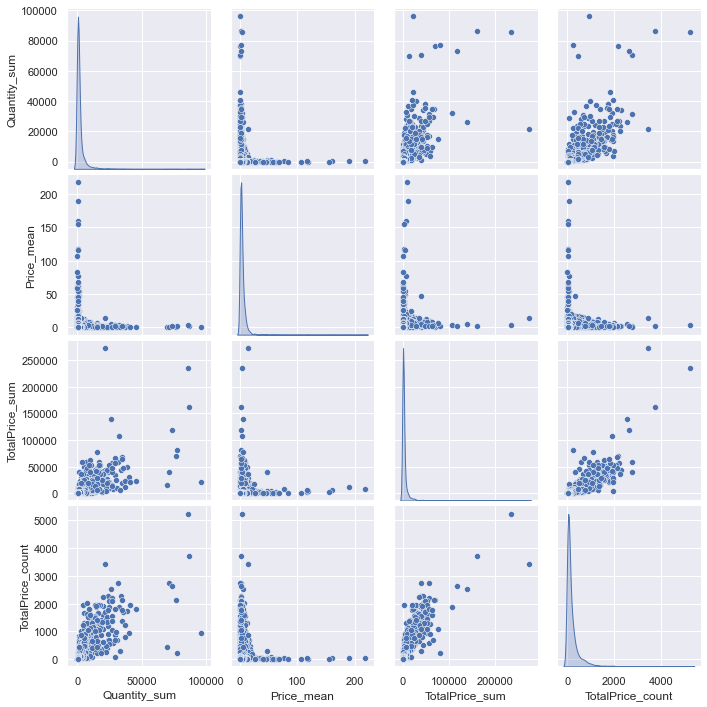

In [8]:
# Flatten the muli-level columns
product.columns = ["_".join(a) for a in product.columns.to_flat_index()]

# Check the distribution 
_ = sns.pairplot(product, diag_kind='kde')

All features are right-skewed. As comparison, We will display the features' distribution after taking logarithm.

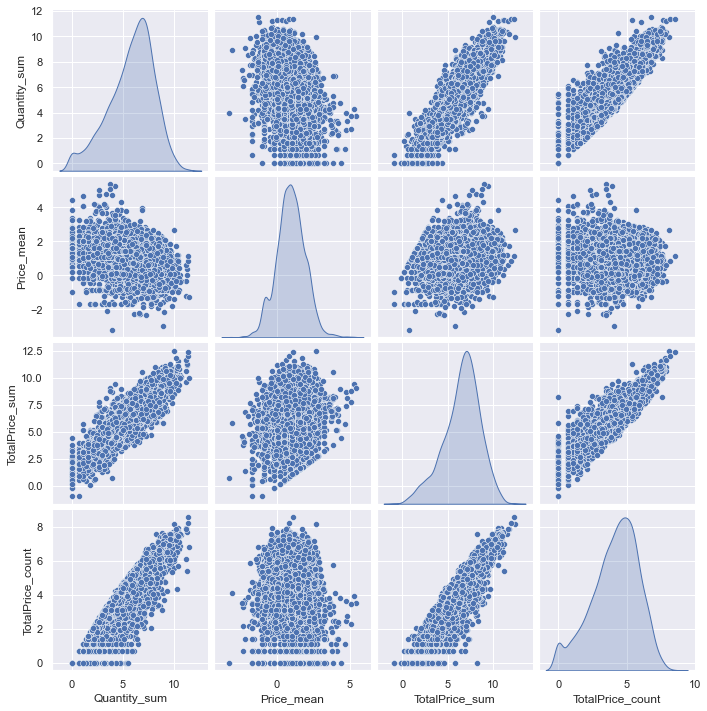

In [9]:
# Take logarithm
log_product = np.log(product)
# The distribution after applying logarithm transformation 
_ = sns.pairplot(log_product, diag_kind='kde')

After applying logarithm transformation, the numeric features are not perfectly symmetrical but have very little skewness compared to the original distribution.

## Monthly/Seasonally Performance Analysis

### Revenue and Sales Volume of All the Products

For an on-line retail, monthly revenue can be considered as a critical metric to evaluate the company's performance.

#### Monthly Performance

In [10]:
# Downsample InvoiceDate into month bins and sum the values of quantity and totalprice falling into the bins.
month_retail = retail.resample('M', on='InvoiceDate').sum()[['Quantity', 'TotalPrice']]
# Rename the columns
month_retail.rename({'TotalPrice': 'MonthRevenue'}, axis=1, inplace=True)

In [11]:
month_retail

,Quantity,MonthRevenue
InvoiceDate,,
2009-12-31,383631,715672.58
2010-01-31,255217,476816.63
2010-02-28,242145,443363.23
2010-03-31,403540,665085.04
2010-04-30,302300,553739.84
2010-05-31,337097,550370.41
2010-06-30,346620,599382.08
2010-07-31,290757,548533.93
2010-08-31,331065,577565.06


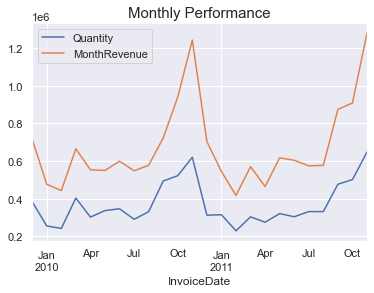

In [12]:
# The quantity and revenue by month
month_retail.plot()
_ = plt.title('Monthly Performance', fontsize=15)

It's obvious that the quantity of products sold and the revenue are significantly affected by holiday season, which increased and reached the highest point at November, then decrease. 

Let's check the seasonally performance. Here, we define four seasons: December, January, and February; March, April, and May; June, July, and August; September, October, and November. So here, we will re-sample the dataset by three months with period index.

#### Seasonally Performance

In [13]:
# Downsample InvoiceDate into season bins and sum the values of quantity and totalprice falling into the bins.
season_retail = retail.resample('3M', on='InvoiceDate', kind='period').sum()[['Quantity', 'TotalPrice']]
# Rename the columns
season_retail.rename({'TotalPrice': 'SeasonRevenue'}, axis=1, inplace=True)

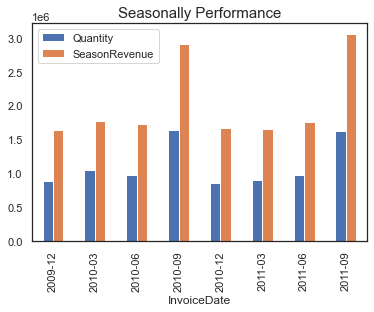

In [14]:
# The quantity and revenue by month
sns.set(style='white')
season_retail.plot.bar()
_ = plt.title('Seasonally Performance', fontsize=15)

It's obvious that the season of September, October and December has much greater performance than the other three seasons.

Now, let's check the average price of all the products by month.

### Average Price by Month

#### Average Price of all the Products

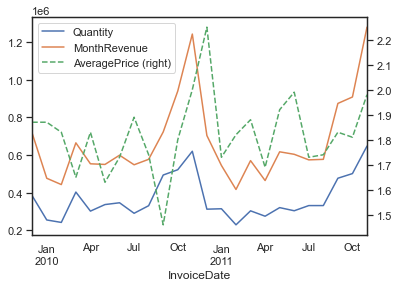

In [15]:
# Add average price column
month_retail['AveragePrice'] = (month_retail.MonthRevenue / month_retail.Quantity).round(2)
_ = month_retail.plot(secondary_y=['AveragePrice'], style={'AveragePrice':'--'})

For the average price, the highest point was at December 2010, but we can't draw more conclusion since we have no information of December 2011. Besides, the average was very low at September 2010.

There are several possible reasons for the average price variation, such as: the company raise or lower the price of some products because of holidays or marketing campaign; the products with higher/lower price are more popular during holiday/non-holiday seasons. We can check in further depth; new products enter the market or old product exist the marked. 

### Active Customers

#### Monthly Active Customers

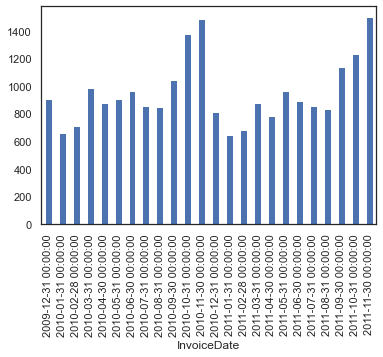

In [16]:
month_active_customer = retail.resample('M', on='InvoiceDate').nunique().CustomerID

_ = month_active_customer.plot.bar()

According to the dataset description, many customers of the company are wholesalers. It's reasonable that the active customers reach to the highest point around October and November since they need to buy products long before Christmas and New Year. The pattern of monthly active customers match with monthly revenue and sales volume.

Let's check the active customers by season.

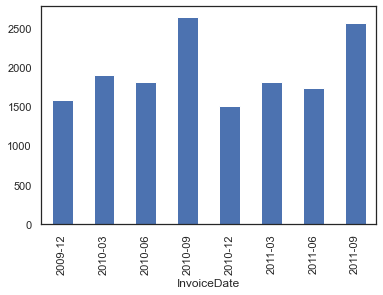

In [17]:
season_active_customer = retail.resample('3M', on='InvoiceDate', kind='period').nunique().CustomerID
_ = season_active_customer.plot.bar()

As we expected, more active customer buy products during pre-holiday season, i.e., September, October, and November.

## Time Cohort Analysis

Time cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. There are other types of cohort , such as behavior cohort and size cohort. For this object, we will focus on time cohort analysis.

Now, we will remove all the transactions without Customer ID, which is labeled as 0.

In [18]:
# Keep transactions with Customer ID only
retail = retail[retail.CustomerID!=0]

(retail.CustomerID==0).sum()

0

### Acquisition Month Cohort

In this project, we group customers into cohorts based on the month of their first purchase(within the timeframe of dataset).

In [19]:
# Find out the date when the customer purchased for the first time
cohort_date = retail.groupby('CustomerID')['InvoiceDate'].transform('min')
# Define cohort based on the month
retail['CohortMonth'] = cohort_date.apply(lambda x: dt(x.year, x.month, 1))
retail['InvoiceMonth'] = retail.InvoiceDate.apply(lambda x: dt(x.year, x.month, 1))
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,TotalPrice,CohortMonth,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,83.40,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.00,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.00,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,100.80,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,30.00,2009-12-01,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
899080,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30,1.25,15444.0,5.00,2011-10-01,2011-11-01
899081,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30,5.95,15444.0,11.90,2011-10-01,2011-11-01
899082,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30,2.08,15444.0,12.48,2011-10-01,2011-11-01
899083,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30,7.95,15444.0,7.95,2011-10-01,2011-11-01


In [20]:
retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,TotalPrice,CohortMonth,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,83.40,2009-12-01,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.00,2009-12-01,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.00,2009-12-01,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,100.80,2009-12-01,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,30.00,2009-12-01,2009-12-01
...,...,...,...,...,...,...,...,...,...,...
899080,579885,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-30,1.25,15444.0,5.00,2011-10-01,2011-11-01
899081,579885,21742,LARGE ROUND WICKER PLATTER,2,2011-11-30,5.95,15444.0,11.90,2011-10-01,2011-11-01
899082,579885,23084,RABBIT NIGHT LIGHT,6,2011-11-30,2.08,15444.0,12.48,2011-10-01,2011-11-01
899083,579885,21257,VICTORIAN SEWING BOX MEDIUM,1,2011-11-30,7.95,15444.0,7.95,2011-10-01,2011-11-01


We will calculate the number of months since the acquisition for every Customer ID

In [21]:
def get_date(df, column):
    # Extract year, month, day from a date
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [22]:
# Extract the year, month, day of invoice date
invoice_y, invoice_m, invoice_d = get_date(retail, 'InvoiceDate')
# Extract the year, month, day of cohort month
cohort_y, cohort_m, cohort_d = get_date(retail, 'CohortMonth')
# Define cohort index with the number of months since the customer's first purchase
retail['CohortIndex'] = (invoice_y - cohort_y) * 12 + (invoice_m - cohort_m) + 1
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,TotalPrice,CohortMonth,InvoiceMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,83.4,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.0,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,81.0,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,100.8,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,30.0,2009-12-01,2009-12-01,1


Now, we can calculate monthly active customers from each cohort

### Monthly Active Customers by Cohort

In [23]:
# Calculate the monthly active customers from each cohort
monthly_cohort = retail.groupby(['CohortMonth', 'CohortIndex']).nunique().CustomerID.to_frame()
monthly_cohort = pd.pivot_table(monthly_cohort, index='CohortMonth', columns='CohortIndex')
monthly_cohort

CustomerID                                                   \
CohortIndex         1      2      3      4      5      6      7      8    
CohortMonth                                                               
2009-12-01       902.0  315.0  296.0  380.0  339.0  322.0  334.0  311.0   
2010-01-01       340.0   72.0  109.0  108.0   90.0  109.0   87.0   80.0   
2010-02-01       344.0   81.0   77.0  105.0   83.0   70.0   63.0   99.0   
2010-03-01       411.0   81.0   98.0  102.0   96.0   87.0  104.0  127.0   
2010-04-01       268.0   52.0   55.0   45.0   51.0   59.0   74.0   70.0   
2010-05-01       234.0   36.0   40.0   42.0   42.0   59.0   52.0   30.0   
2010-06-01       243.0   42.0   47.0   51.0   56.0   70.0   32.0   19.0   
2010-07-01       163.0   25.0   28.0   49.0   46.0   22.0   15.0   21.0   
2010-08-01       149.0   30.0   43.0   46.0   24.0   18.0   12.0   19.0   
2010-09-01       216.0   54.0   50.0   29.0   19.0   23.0   32.0   20.0   
2010-10-01       337.0   84.0   50.0   37.0   28.0   26.0   45.0   46.0   
2010-11-01       306.0   54.0   27.0   28.0   22.0   28.0   42.0   33.0   
2010-12-01        64.0    5.0    3.0    5.0    6.0    5.0    3.0    5.0   
2011-01-01        63.0   11.0   15.0   14.0   16.0   10.0    9.0    7.0   
2011-02-01       109.0   17.0   18.0   19.0   27.0   18.0   17.0   16.0   
2011-03-01       164.0   30.0   37.0   33.0   34.0   25.0   32.0   31.0   
2011-04-01        93.0   23.0   16.0   19.0   17.0   22.0   16.0   25.0   
2011-05-01        97.0   22.0   22.0   17.0   21.0   19.0   25.0    NaN   
2011-06-01        94.0   23.0   17.0   24.0   19.0   24.0    NaN    NaN   
2011-07-01        89.0   19.0   28.0   26.0   32.0    NaN    NaN    NaN   
2011-08-01        87.0   25.0   25.0   22.0    NaN    NaN    NaN    NaN   
2011-09-01       169.0   44.0   64.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01       195.0   64.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01       176.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                           ...                                            \
CohortIndex     9      10  ...     15     16     17     18     19     20   
CohortMonth                ...                                             
2009-12-01   304.0  318.0  ...  216.0  262.0  236.0  269.0  247.0  225.0   
2010-01-01    94.0  110.0  ...   65.0   53.0   82.0   69.0   64.0   67.0   
2010-02-01    89.0   95.0  ...   44.0   66.0   52.0   59.0   47.0   80.0   
2010-03-01   116.0   45.0  ...   83.0   69.0   75.0   64.0   72.0   85.0   
2010-04-01    27.0   25.0  ...   40.0   42.0   36.0   43.0   46.0   59.0   
2010-05-01    14.0   15.0  ...   20.0   27.0   31.0   40.0   33.0    NaN   
2010-06-01    20.0   27.0  ...   27.0   25.0   30.0   49.0    NaN    NaN   
2010-07-01    20.0   19.0  ...   31.0   28.0   38.0    NaN    NaN    NaN   
2010-08-01    19.0   20.0  ...   26.0   28.0    NaN    NaN    NaN    NaN   
2010-09-01    28.0   28.0  ...   36.0    NaN    NaN    NaN    NaN    NaN   
2010-10-01    35.0   32.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2010-11-01    28.0   29.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2010-12-01     4.0    2.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-01-01     8.0   13.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-02-01    17.0   19.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-03-01    39.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-04-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-05-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-06-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-07-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-08-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-09-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-10-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01

Here, 1 of Cohort Index represents the month, in which the cohort purchase for the first time; 2 represents the following month, and so on.

### Customer Retention

The retention measures how many customers from each of the cohort have returned in the subsequent months. We can calculate the retention rate, i.e., the ratio of how many of these customers came back in the subsequent months.

In [24]:
# Calculate the size of each cohort
cohort_sizes = monthly_cohort.iloc[:,0]
# Calculate the retention rate (percentage)
retention = monthly_cohort.divide(cohort_sizes, axis=0).round(3)
retention

CustomerID                                                   \
CohortIndex         1      2      3      4      5      6      7      8    
CohortMonth                                                               
2009-12-01         1.0  0.349  0.328  0.421  0.376  0.357  0.370  0.345   
2010-01-01         1.0  0.212  0.321  0.318  0.265  0.321  0.256  0.235   
2010-02-01         1.0  0.235  0.224  0.305  0.241  0.203  0.183  0.288   
2010-03-01         1.0  0.197  0.238  0.248  0.234  0.212  0.253  0.309   
2010-04-01         1.0  0.194  0.205  0.168  0.190  0.220  0.276  0.261   
2010-05-01         1.0  0.154  0.171  0.179  0.179  0.252  0.222  0.128   
2010-06-01         1.0  0.173  0.193  0.210  0.230  0.288  0.132  0.078   
2010-07-01         1.0  0.153  0.172  0.301  0.282  0.135  0.092  0.129   
2010-08-01         1.0  0.201  0.289  0.309  0.161  0.121  0.081  0.128   
2010-09-01         1.0  0.250  0.231  0.134  0.088  0.106  0.148  0.093   
2010-10-01         1.0  0.249  0.148  0.110  0.083  0.077  0.134  0.136   
2010-11-01         1.0  0.176  0.088  0.092  0.072  0.092  0.137  0.108   
2010-12-01         1.0  0.078  0.047  0.078  0.094  0.078  0.047  0.078   
2011-01-01         1.0  0.175  0.238  0.222  0.254  0.159  0.143  0.111   
2011-02-01         1.0  0.156  0.165  0.174  0.248  0.165  0.156  0.147   
2011-03-01         1.0  0.183  0.226  0.201  0.207  0.152  0.195  0.189   
2011-04-01         1.0  0.247  0.172  0.204  0.183  0.237  0.172  0.269   
2011-05-01         1.0  0.227  0.227  0.175  0.216  0.196  0.258    NaN   
2011-06-01         1.0  0.245  0.181  0.255  0.202  0.255    NaN    NaN   
2011-07-01         1.0  0.213  0.315  0.292  0.360    NaN    NaN    NaN   
2011-08-01         1.0  0.287  0.287  0.253    NaN    NaN    NaN    NaN   
2011-09-01         1.0  0.260  0.379    NaN    NaN    NaN    NaN    NaN   
2011-10-01         1.0  0.328    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01         1.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                           ...                                            \
CohortIndex     9      10  ...     15     16     17     18     19     20   
CohortMonth                ...                                             
2009-12-01   0.337  0.353  ...  0.239  0.290  0.262  0.298  0.274  0.249   
2010-01-01   0.276  0.324  ...  0.191  0.156  0.241  0.203  0.188  0.197   
2010-02-01   0.259  0.276  ...  0.128  0.192  0.151  0.172  0.137  0.233   
2010-03-01   0.282  0.109  ...  0.202  0.168  0.182  0.156  0.175  0.207   
2010-04-01   0.101  0.093  ...  0.149  0.157  0.134  0.160  0.172  0.220   
2010-05-01   0.060  0.064  ...  0.085  0.115  0.132  0.171  0.141    NaN   
2010-06-01   0.082  0.111  ...  0.111  0.103  0.123  0.202    NaN    NaN   
2010-07-01   0.123  0.117  ...  0.190  0.172  0.233    NaN    NaN    NaN   
2010-08-01   0.128  0.134  ...  0.174  0.188    NaN    NaN    NaN    NaN   
2010-09-01   0.130  0.130  ...  0.167    NaN    NaN    NaN    NaN    NaN   
2010-10-01   0.104  0.095  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2010-11-01   0.092  0.095  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2010-12-01   0.062  0.031  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-01-01   0.127  0.206  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-02-01   0.156  0.174  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-03-01   0.238    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-04-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-05-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-06-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-07-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-08-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-09-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-10-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01

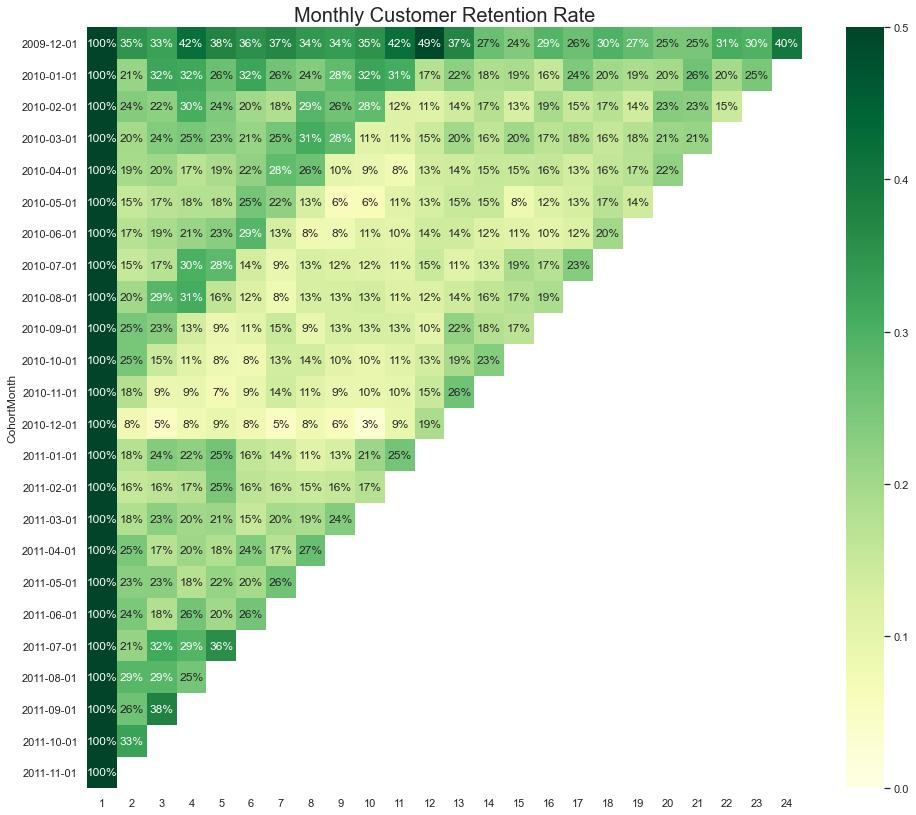

In [25]:
# Use the Cohort Index as columns name for heatmap
retention.columns = [a[1] for a in retention.columns.to_flat_index()]

plt.figure(figsize=(16, 14))
plt.title('Monthly Customer Retention Rate', fontsize=20)
_ = sns.heatmap(data=retention, annot=True, fmt='.0%', 
                vmin=0, vmax=0.5, cmap='YlGn', yticklabels=retention.index.strftime('%Y-%m-%d'))

The statistics of the first several months of the dataset, especially December 2009, can not present the real world because of the absence of the previous months. According to the heatmap, the retention rates are relatively higher in the pre-holiday season than the other periods.

### Average Monthly Revenue for Each Cohort

In [26]:
revenue_cohort = retail.groupby(['CohortMonth', 'CohortIndex'])['TotalPrice'].sum().reset_index()
revenue_cohort = revenue_cohort.pivot(index='CohortMonth', columns='CohortIndex').divide(1000).round()
revenue_cohort

TotalPrice                                                   \
CohortIndex         1      2      3      4      5      6      7      8    
CohortMonth                                                               
2009-12-01       598.0  268.0  225.0  307.0  266.0  256.0  235.0  268.0   
2010-01-01       131.0   35.0   44.0   47.0   44.0   57.0   40.0   43.0   
2010-02-01       146.0   29.0   37.0   47.0   38.0   38.0   28.0   47.0   
2010-03-01       192.0   49.0   49.0   62.0   44.0   54.0   61.0   76.0   
2010-04-01       100.0   16.0   20.0   28.0   21.0   24.0   30.0   27.0   
2010-05-01        88.0   13.0   13.0   11.0   14.0   23.0   21.0    9.0   
2010-06-01       110.0   14.0   21.0   22.0   30.0   28.0   14.0    5.0   
2010-07-01        55.0    7.0   11.0   20.0   21.0    6.0    6.0    7.0   
2010-08-01        54.0   10.0   18.0   19.0   10.0    5.0    4.0    7.0   
2010-09-01       145.0   33.0   28.0   11.0   24.0    8.0   25.0    9.0   
2010-10-01       149.0   35.0   16.0   18.0   11.0   10.0   15.0   15.0   
2010-11-01       127.0   24.0   14.0    9.0    8.0   11.0   16.0   11.0   
2010-12-01        20.0    2.0    1.0    1.0    2.0    1.0    1.0    1.0   
2011-01-01        44.0    4.0    4.0   26.0    8.0    6.0    4.0    4.0   
2011-02-01        38.0    7.0   13.0    9.0    9.0    5.0    7.0    9.0   
2011-03-01        63.0   14.0   20.0   15.0   13.0   10.0   14.0   15.0   
2011-04-01        34.0   11.0    6.0    6.0    5.0    9.0    5.0   11.0   
2011-05-01        32.0    8.0    7.0    6.0    9.0    6.0   12.0    NaN   
2011-06-01        72.0    8.0    5.0    9.0    6.0   10.0    NaN    NaN   
2011-07-01        34.0    6.0   10.0   11.0   11.0    NaN    NaN    NaN   
2011-08-01        31.0   16.0   25.0   32.0    NaN    NaN    NaN    NaN   
2011-09-01        80.0   17.0   28.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01        80.0   32.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01        75.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                           ...                                            \
CohortIndex     9      10  ...     15     16     17     18     19     20   
CohortMonth                ...                                             
2009-12-01   261.0  277.0  ...  172.0  194.0  145.0  220.0  222.0  196.0   
2010-01-01    50.0   57.0  ...   37.0   29.0   43.0   34.0   38.0   37.0   
2010-02-01    48.0   47.0  ...   19.0   31.0   23.0   32.0   20.0   41.0   
2010-03-01    68.0   20.0  ...   44.0   29.0   40.0   44.0   41.0   51.0   
2010-04-01     8.0   11.0  ...   14.0   17.0   15.0   19.0   21.0   25.0   
2010-05-01     5.0    5.0  ...    7.0    8.0   15.0   16.0   12.0    NaN   
2010-06-01    10.0   11.0  ...   22.0   10.0   14.0   18.0    NaN    NaN   
2010-07-01     7.0    8.0  ...   14.0   13.0   17.0    NaN    NaN    NaN   
2010-08-01     9.0    9.0  ...   13.0   13.0    NaN    NaN    NaN    NaN   
2010-09-01    27.0   13.0  ...   44.0    NaN    NaN    NaN    NaN    NaN   
2010-10-01    19.0   18.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2010-11-01    10.0   11.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2010-12-01     1.0    1.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-01-01     4.0   10.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-02-01     9.0   11.0  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-03-01    20.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-04-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-05-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-06-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-07-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-08-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-09-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-10-01     NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01

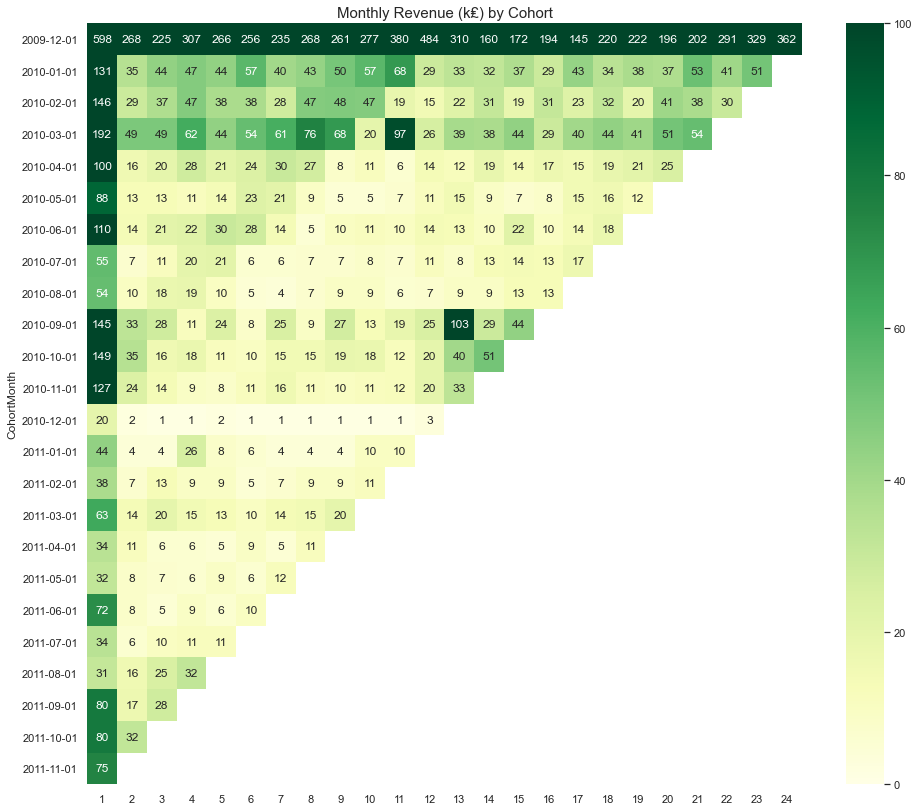

In [27]:
revenue_cohort.columns = [a[1] for a in revenue_cohort.columns.to_flat_index()]

plt.figure(figsize=(16,14))
plt.title('Monthly Revenue (k₤) by Cohort', fontsize=15)
_ = sns.heatmap(revenue_cohort, cmap='YlGn', annot=True, fmt='.3g',
                vmin=0, vmax=100, yticklabels=revenue_cohort.index.strftime('%Y-%m-%d'))

The revenue by cohort has the similar pattern with retention rate. Excluding the first few months, the revenues from different cohorts are higher in pre-holidays season and the acquisition month.

## Customer Lifetime Value(CLV)

The customer lifetime value is a measurement of how much a company expects to earn from an average customer in a lifetime. It can be historical, and we also can predict the customer lifetime value. Here, we will calculate historical CLV only by summing up each customer's revenue instead of profit since we have no cost data.

### Basic CLV

#### Calculating by Month

In [28]:
# Calculate monthly spend per customer
monthly_revenue = retail.groupby(['CustomerID', 'InvoiceMonth'])['TotalPrice'].sum()
monthly_revenue

CustomerID  InvoiceMonth
12346.0     2010-03-01         21.10
            2010-06-01        142.31
            2011-01-01      77183.60
12608.0     2010-10-01        415.79
12745.0     2010-05-01        456.92
                              ...   
18287.0     2010-05-01       1071.61
            2010-09-01        892.60
            2010-11-01        331.50
            2011-05-01        765.28
            2011-10-01       1072.00
Name: TotalPrice, Length: 22797, dtype: float64

In [29]:
# Calculate average monthly spend 
monthly_revenue_average = monthly_revenue.mean()
# Set lifespan as 12
lifespan_month = 12
# Calculate CLV
clv_m_basic = round(monthly_revenue_average * lifespan_month, 1)

clv_m_basic

7248.3

#### Calculating by Year

In [30]:
retail['InvoiceYear'] = dt(2010,11,1)

In [31]:
retail.loc[retail[retail.InvoiceMonth > '2010-11-01'].index, 'InvoiceYear'] = dt(2011,11,1)

In [32]:
retail.InvoiceYear.value_counts()

2010-11-01    350060
2011-11-01    333134
Name: InvoiceYear, dtype: int64

In [33]:
yearly_revenue = retail.groupby(['CustomerID', 'InvoiceYear'])['TotalPrice'].sum()

In [34]:
yearly_revenue

CustomerID  InvoiceYear
12346.0     2010-11-01       163.41
            2011-11-01     77183.60
12608.0     2010-11-01       415.79
12745.0     2010-11-01       723.85
12746.0     2010-11-01       254.55
                             ...   
18284.0     2010-11-01       411.68
18285.0     2010-11-01       377.00
18286.0     2010-11-01      1246.43
18287.0     2010-11-01      2295.71
            2011-11-01      1837.28
Name: TotalPrice, Length: 7795, dtype: float64

In [35]:
yearly_revenue_average = yearly_revenue.mean()
lifespan_year = 1
clv_year_basic = yearly_revenue_average * lifespan_year
clv_year_basic

1766.5047825529216

### Traditional CLV

The traditional CLV is the most popular descriptive customer lifetime value technique. It incorporates retention and churn rates, which is defined as 1 minus retention. The retention to churn ratio can act as a proxy to expected length of the customer lifespan with the company. So here, we don't need to define customer lifespan as we did when calculating basic CLV. 

The traditional CLV assumes that the churn is final. When we calculate traditional CLV based on average monthly revenue, we assume that the customers who don't come back the next month, are not coming back in the later periods. But it's not always the case in the real world, especially in non-contract business.

In [36]:
# The retention rate we have calculated above
retention

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2009-12-01,1.0,0.349,0.328,0.421,0.376,0.357,0.370,0.345,0.337,0.353,...,0.239,0.290,0.262,0.298,0.274,0.249,0.249,0.306,0.297,0.401
2010-01-01,1.0,0.212,0.321,0.318,0.265,0.321,0.256,0.235,0.276,0.324,...,0.191,0.156,0.241,0.203,0.188,0.197,0.259,0.197,0.247,NaN
2010-02-01,1.0,0.235,0.224,0.305,0.241,0.203,0.183,0.288,0.259,0.276,...,0.128,0.192,0.151,0.172,0.137,0.233,0.227,0.148,NaN,NaN
2010-03-01,1.0,0.197,0.238,0.248,0.234,0.212,0.253,0.309,0.282,0.109,...,0.202,0.168,0.182,0.156,0.175,0.207,0.212,NaN,NaN,NaN
2010-04-01,1.0,0.194,0.205,0.168,0.190,0.220,0.276,0.261,0.101,0.093,...,0.149,0.157,0.134,0.160,0.172,0.220,NaN,NaN,NaN,NaN
2010-05-01,1.0,0.154,0.171,0.179,0.179,0.252,0.222,0.128,0.060,0.064,...,0.085,0.115,0.132,0.171,0.141,NaN,NaN,NaN,NaN,NaN
2010-06-01,1.0,0.173,0.193,0.210,0.230,0.288,0.132,0.078,0.082,0.111,...,0.111,0.103,0.123,0.202,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.0,0.153,0.172,0.301,0.282,0.135,0.092,0.129,0.123,0.117,...,0.190,0.172,0.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.0,0.201,0.289,0.309,0.161,0.121,0.081,0.128,0.128,0.134,...,0.174,0.188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Calculate average monthly retention rate
# Exclude the first month, of which the retention rate is 100%
retention_average = retention.iloc[:,1:].mean().mean()
# Calculate traditional CLV
clv_month_tradition = monthly_revenue_average * retention_average / (1 - retention_average)

clv_month_tradition

153.267172067262

It's much lower than the basic CLV since here we assume that the customers, who don't buy products in the next month, will not come back anymore. 

## Recency, frequency, monetary(RFM) 

RFM are customer behavior metrics:
* Recency: measures how recent was each customer's last purchase
* Frequency: measures how many purchases the customer has done in the last 12 months
* Monetary Value - measures how much has the customer spent in the last 12 months. 

In [38]:
# Define a sanpshot date with the last date of the dataset plus 1
snapshot_date = dt(2011,12,1)
retail_rfm = retail.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'count',
    'TotalPrice': 'sum'})
# Rename columns with RFM
retail_rfm.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'TotalPrice': 'MonetaryValue'}, inplace=True)

retail_rfm

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,317,24,77347.01
12608.0,396,16,415.79
12745.0,478,22,723.85
12746.0,532,17,254.55
12747.0,14,242,8459.98
...,...,...,...
18283.0,1,886,2450.95
18284.0,423,27,411.68
18285.0,652,11,377.00


           Recency     Frequency  MonetaryValue
count  5313.000000   5313.000000    5313.000000
mean    200.921137    128.589121    2591.738148
std     206.925860    304.176257   11161.101141
min       1.000000      1.000000       2.900000
25%      25.000000     20.000000     324.450000
50%     104.000000     51.000000     818.790000
75%     374.000000    134.000000    2118.720000
max     730.000000  11952.000000  564101.500000


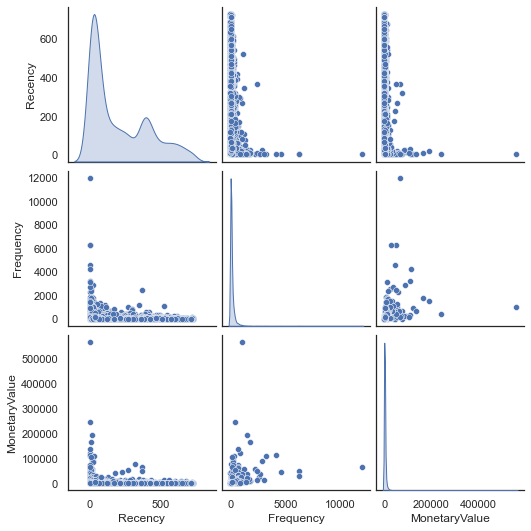

In [39]:
# Check the distribution
print(retail_rfm.describe())
_ = sns.pairplot(retail_rfm, diag_kind='kde')

As we can see, the recency, frequency and monetary value are all right-skewed. We will use them to do customer segmentation in the following step and before that, we will un-skew the data.